Objective: Understand the inner workings of the kNN algorithm by implementing it from scratch
and use it to classify sample data points.
Requirements:
1. Python environment (e.g., Jupyter Notebook, Google Colab).
2. Required Libraries: numpy, matplotlib for visualization.

### 1. Setup & Data Generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

C:\Users\vijay\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


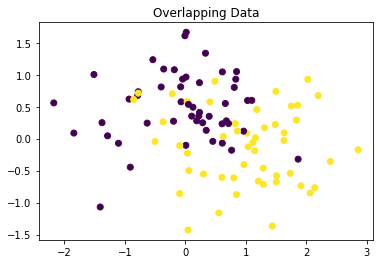

In [2]:
X, y = datasets.make_moons(n_samples=100,noise=0.5, random_state=40)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Overlapping Data")
plt.show()

In [3]:
clf = SVC(C=float(1e6), kernel='linear')
clf.fit(X, y)

SVC(C=1000000.0, kernel='linear')

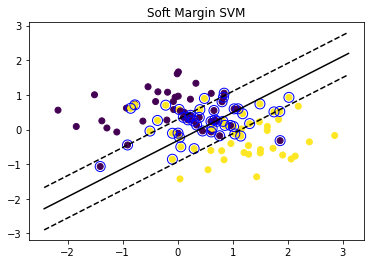

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)
ax = plt.gca()
xlim = ax.get_xlim()
# Decision Boundary
xx = np.linspace(xlim[0], xlim[1])
yy = -(clf.coef_[0][0] * xx + clf.intercept_[0]) / clf.coef_[0][1]
plt.plot(xx, yy, 'k-')
# Margin lines
yy = -(clf.coef_[0][0] * xx + clf.intercept_[0] - 1) / clf.coef_[0][1]
plt.plot(xx, yy, 'k--')
yy = -(clf.coef_[0][0] * xx + clf.intercept_[0] + 1) / clf.coef_[0][1]
plt.plot(xx, yy, 'k--')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='b')
plt.title("Soft Margin SVM")
plt.show()

In [5]:
from sklearn.metrics import classification_report
# Predictions for hard margin SVM
y_pred = clf.predict(X)
# Classification report for hard margin SVM
print("Classification Report for SVM:")
print(classification_report(y, y_pred))

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.81      0.88      0.85        50
           1       0.87      0.80      0.83        50

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



In [6]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# Load dataset
X,y = make_moons(n_samples=100, noise=0.5, random_state=42)
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [7]:
# Define a range of `k` values
k_values = list(range(1, 50))
cross_val_scores = []
# Perform 10-fold cross-validation for each `k`
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10,scoring="accuracy")
    cross_val_scores.append(scores.mean())
# Identify the best `k` based on cross-validation scores
optimal_k = k_values[cross_val_scores.index(max(cross_val_scores))]
print(f"The optimal number of neighbors is {optimal_k}")

The optimal number of neighbors is 11


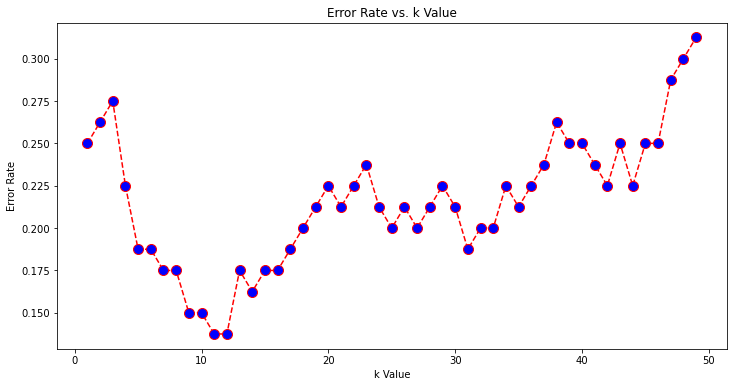

In [8]:
# Calculate error rates from cross-validation scores
error_rates = [1 - score for score in cross_val_scores]
# Plot
plt.figure(figsize=(12, 6))
plt.plot(k_values, error_rates, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Error Rate')
plt.show()